In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [3]:
# Rodando o dataset
police = pd.read_csv('police_use_of_force.csv')
police.head()

C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,7,8,10,12,13,14,15,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
0,-93.273141,44.980808,15928382,08-000149,2008/01/01 01:29:47+00,Code 3,No,MISC,NaN,1,...,322402,46998.0,23458,17121,44.980808,-93.273141,-1.038312e+07,5.618501e+06,2020/11/02 08:18:49+00,1
1,-93.251092,44.961813,15928383,08-012774,2008/01/13 03:21:52+00,Suspicious Vehicle,No,FLEE,No,2,...,322402,84018.0,10316,17023,44.961813,-93.251092,-1.038066e+07,5.615512e+06,2020/11/02 08:18:49+00,2
2,-93.266112,44.974295,15928384,08-019237,2008/01/20 03:47:57+00,Unwanted Person,Yes,OBSTRU,No,3,...,322402,46998.0,23458,21739,44.974295,-93.266112,-1.038234e+07,5.617476e+06,2020/11/02 08:18:49+00,3
3,-93.295639,45.000883,15928385,08-030704,2008/02/01 06:15:20+00,Attempt Pick-Up,No,CHLDAB,NaN,2,...,322402,80434.0,15344,22445,45.000883,-93.295639,-1.038562e+07,5.621661e+06,2020/11/02 08:18:49+00,4
4,-93.290726,45.013029,15928386,08-038956,2008/02/09 03:49:09+00,Neighbor Trouble,Yes,OBSTRU,Yes,2,...,322402,80434.0,13679,25902,45.013029,-93.290726,-1.038508e+07,5.623573e+06,2020/11/02 08:18:49+00,5


In [4]:
police.shape

(33257, 30)

In [5]:
# Filtrando o dataset para remover entradas indesejdas cujos resultados não são proveitosos para o modelo:
police2 = police.drop(columns=['X', 'Y', 'ForceTypeAction', 'PoliceUseOfForceID', 'CaseNumber', 'ResponseDate', 'ForceReportNumber', 'SubjectRole', 'SubjectRoleNumber', 'CenterGBSID', 'OBJECTID', 'DateAdded', 'CenterX', 'CenterY', 'CenterLatitude', 'CenterLongitude'])

* Dados relacionados a latitude e longitude foram desconsiderados, uma vez que para a análise os dados de localização baseado em distrito policial e bairro são mais proveitosos para que a análise não se torne muito complexa, uma vez que o intuito do modelo não é ver atitudes policiais em pontos muito específicos.
* As features PoliceUseOfForceID, CaseNumber, ResponseDate, ForceReportNumber, SubjectRole, SubjectRoleNumber, CenterGBSID, OBJECTID, DateAdded foram desconsideradas por se tratarem de códigos policiais que não são necessários para a análise.
* A feature ForceTypeAction foi desconsiderada pois será considerado os casos genéricos de "agressões" na feature ForceType.

In [6]:
police2.head()

,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceType,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear
0,Code 3,No,MISC,NaN,Bodily Force,White,Male,39.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
1,Suspicious Vehicle,No,FLEE,No,Bodily Force,Black,Male,30.0,Fled in Vehicle,03,Ventura Village,322402,84018.0,10316
2,Unwanted Person,Yes,OBSTRU,No,Bodily Force,Black,Male,40.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
3,Attempt Pick-Up,No,CHLDAB,NaN,Bodily Force,Black,Female,35.0,Commission of Crime,04,Jordan,322402,80434.0,15344
4,Neighbor Trouble,Yes,OBSTRU,Yes,Bodily Force,Black,Male,46.0,Tensed,04,Hawthorne,322402,80434.0,13679


## Tabelas comparativas entre a target e as demais features considerando todos os valores

In [7]:
# Tabela cruzada para Raça:
pd.crosstab(police2['ForceType'], police2['Race'], normalize = 'index').round(3)

Race,Asian,Black,Native American,Other / Mixed Race,Pacific Islander,Unknown,White,not recorded
ForceType,,,,,,,,
Baton,0.034,0.603,0.052,0.069,0.000,0.052,0.190,0.000
Bodily Force,0.013,0.615,0.054,0.036,0.000,0.017,0.258,0.007
Chemical Irritant,0.022,0.651,0.029,0.043,0.000,0.054,0.166,0.035
Firearm,0.023,0.523,0.023,0.000,0.000,0.000,0.205,0.227
Gun Point Display,0.018,0.699,0.064,0.057,0.000,0.000,0.155,0.007
Improvised Weapon,0.003,0.669,0.057,0.037,0.000,0.014,0.220,0.000
Less Lethal,0.000,0.104,0.104,0.000,0.000,0.438,0.354,0.000
Less Lethal Projectile,0.000,0.438,0.062,0.125,0.000,0.000,0.375,0.000
Maximal Restraint Technique,0.000,0.618,0.056,0.000,0.014,0.049,0.264,0.000


In [8]:
# Tabela para Sexo:
pd.crosstab(police2['ForceType'], police2['Sex'], normalize = 'index').round(3)

Sex,Female,Male,Unknown,not recorded
ForceType,,,,
Baton,0.069,0.897,0.034,0.000
Bodily Force,0.114,0.880,0.003,0.003
Chemical Irritant,0.256,0.684,0.027,0.032
Firearm,0.045,0.864,0.000,0.091
Gun Point Display,0.014,0.986,0.000,0.000
Improvised Weapon,0.089,0.911,0.000,0.000
Less Lethal,0.042,0.688,0.271,0.000
Less Lethal Projectile,0.000,1.000,0.000,0.000
Maximal Restraint Technique,0.208,0.792,0.000,0.000


In [9]:
# Tabela para tipo de resistência:
pd.crosstab(police2['ForceType'], police2['TypeOfResistance'], normalize = 'index').round(3)

TypeOfResistance,Assaulted Officer,Assaulted Officer,Assaulted Police Horse,Assaulted Police K9,Assaulting Police Horse,Assaulting Police K9,COMMISSION OF CRIME,Commission of Crime,Commission of a Crime,Fled in Vehicle,...,Other,TENSED,Tensed,Tensed,Unspecified,Verbal Non-Compliance,Verbal Non-Compliance,commission of crime,tensed,verbal non-compliance
ForceType,,,,,,,,,,,,,,,,,,,,,
Baton,0.103,0.017,0.000,0.0,0.000,0.000,0.0,0.345,0.000,0.017,...,0.000,0.000,0.155,0.000,0.103,0.069,0.000,0.000,0.0,0.0
Bodily Force,0.104,0.021,0.000,0.0,0.002,0.000,0.0,0.148,0.018,0.026,...,0.032,0.000,0.275,0.049,0.068,0.070,0.017,0.000,0.0,0.0
Chemical Irritant,0.034,0.008,0.000,0.0,0.002,0.000,0.0,0.393,0.042,0.003,...,0.030,0.000,0.104,0.007,0.104,0.199,0.028,0.004,0.0,0.0
Firearm,0.209,0.000,0.000,0.0,0.000,0.000,0.0,0.372,0.000,0.023,...,0.000,0.000,0.140,0.000,0.163,0.047,0.000,0.000,0.0,0.0
Gun Point Display,0.055,0.000,0.000,0.0,0.000,0.000,0.0,0.269,0.000,0.077,...,0.000,0.002,0.169,0.000,0.091,0.148,0.000,0.000,0.0,0.0
Improvised Weapon,0.134,0.020,0.000,0.0,0.003,0.000,0.0,0.178,0.015,0.087,...,0.020,0.000,0.155,0.000,0.050,0.076,0.006,0.000,0.0,0.0
Less Lethal,0.000,0.578,0.022,0.0,0.000,0.000,0.0,0.000,0.089,0.000,...,0.244,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.0,0.0
Less Lethal Projectile,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.438,0.000,0.000,...,0.000,0.000,0.000,0.000,0.188,0.188,0.000,0.000,0.0,0.0
Maximal Restraint Technique,0.000,0.191,0.000,0.0,0.000,0.000,0.0,0.000,0.061,0.000,...,0.351,0.000,0.000,0.214,0.000,0.000,0.107,0.000,0.0,0.0


In [10]:
# Tabela para Idade:
pd.crosstab(police2['ForceType'], police2['EventAge'], normalize = 'index').round(3)

EventAge,0.0,6.0,7.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,...,66.0,67.0,69.0,70.0,71.0,72.0,73.0,74.0,77.0,82.0
ForceType,,,,,,,,,,,,,,,,,,,,,
Baton,0.018,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Bodily Force,0.004,0.000,0.0,0.0,0.0,0.0,0.001,0.005,0.008,0.016,...,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Chemical Irritant,0.096,0.001,0.0,0.0,0.0,0.0,0.001,0.003,0.012,0.015,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Firearm,0.163,0.000,0.0,0.0,0.0,0.0,0.000,0.023,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Gun Point Display,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.005,0.011,0.016,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0
Improvised Weapon,0.003,0.000,0.0,0.0,0.0,0.0,0.000,0.003,0.012,0.012,...,0.003,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Less Lethal,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Less Lethal Projectile,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Maximal Restraint Technique,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.007,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0


In [11]:
# Fazendo limpeza para tirar os resultados indeterminados (Nan)
police2.dropna(inplace=True)
police2.shape

(19262, 14)

In [12]:
police2.head()

,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceType,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear
1,Suspicious Vehicle,No,FLEE,No,Bodily Force,Black,Male,30.0,Fled in Vehicle,03,Ventura Village,322402,84018.0,10316
2,Unwanted Person,Yes,OBSTRU,No,Bodily Force,Black,Male,40.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
4,Neighbor Trouble,Yes,OBSTRU,Yes,Bodily Force,Black,Male,46.0,Tensed,04,Hawthorne,322402,80434.0,13679
5,Domestic Abuse-In Progress,Yes,DASLT5,No,Bodily Force,Black,Male,36.0,Tensed,04,Cleveland,322402,80434.0,2992
6,Suspicious Person,No,DISCON,No,Bodily Force,Black,Male,34.0,Tensed,01,Downtown West,322402,46998.0,23458


## Tabelas comparativas entre a target e as demais features depois da limpeza

In [13]:
# Tabela para Raça:
pd.crosstab(police2['ForceType'], police2['Race'], normalize = 'index').round(3)

Race,Asian,Black,Native American,Other / Mixed Race,Pacific Islander,Unknown,White,not recorded
ForceType,,,,,,,,
Baton,0.036,0.600,0.055,0.073,0.0,0.036,0.200,0.000
Bodily Force,0.013,0.626,0.055,0.042,0.0,0.010,0.248,0.006
Chemical Irritant,0.041,0.646,0.039,0.041,0.0,0.018,0.189,0.027
Firearm,0.024,0.548,0.024,0.000,0.0,0.000,0.190,0.214
Gun Point Display,0.016,0.699,0.066,0.058,0.0,0.000,0.153,0.008
Improvised Weapon,0.003,0.688,0.057,0.041,0.0,0.009,0.202,0.000
Less Lethal,0.000,0.500,0.000,0.000,0.0,0.500,0.000,0.000
Less Lethal Projectile,0.000,0.438,0.062,0.125,0.0,0.000,0.375,0.000
Maximal Restraint Technique,0.000,0.643,0.071,0.000,0.0,0.000,0.286,0.000


In [14]:
# Tabela para Sexo:
pd.crosstab(police2['ForceType'], police2['Sex'], normalize = 'index').round(3)

Sex,Female,Male,Unknown,not recorded
ForceType,,,,
Baton,0.073,0.891,0.036,0.000
Bodily Force,0.088,0.908,0.002,0.002
Chemical Irritant,0.198,0.771,0.007,0.024
Firearm,0.048,0.881,0.000,0.071
Gun Point Display,0.016,0.984,0.000,0.000
Improvised Weapon,0.079,0.921,0.000,0.000
Less Lethal,0.000,1.000,0.000,0.000
Less Lethal Projectile,0.000,1.000,0.000,0.000
Maximal Restraint Technique,0.179,0.821,0.000,0.000


In [15]:
# Tabela para tipo de resistência:
pd.crosstab(police2['ForceType'], police2['TypeOfResistance'], normalize = 'index').round(3)

TypeOfResistance,Assaulted Officer,Assaulted Officer,Assaulting Police Horse,Assaulting Police K9,Commission of Crime,Commission of a Crime,Fled in Vehicle,Fled in a Vehicle,Fled on Foot,Fled on Foot,Other,TENSED,Tensed,Tensed,Unspecified,Verbal Non-Compliance,Verbal Non-Compliance,commission of crime,tensed
ForceType,,,,,,,,,,,,,,,,,,,
Baton,0.109,0.000,0.000,0.000,0.345,0.000,0.018,0.000,0.182,0.000,0.000,0.000,0.164,0.000,0.109,0.073,0.000,0.000,0.0
Bodily Force,0.136,0.012,0.002,0.000,0.168,0.007,0.035,0.002,0.175,0.009,0.010,0.000,0.278,0.018,0.070,0.071,0.004,0.000,0.0
Chemical Irritant,0.098,0.005,0.006,0.000,0.362,0.005,0.007,0.000,0.099,0.000,0.002,0.001,0.140,0.003,0.104,0.159,0.003,0.007,0.0
Firearm,0.214,0.000,0.000,0.000,0.381,0.000,0.024,0.000,0.048,0.000,0.000,0.000,0.143,0.000,0.143,0.048,0.000,0.000,0.0
Gun Point Display,0.060,0.000,0.000,0.000,0.285,0.000,0.077,0.000,0.192,0.000,0.000,0.003,0.175,0.000,0.079,0.129,0.000,0.000,0.0
Improvised Weapon,0.145,0.009,0.003,0.000,0.186,0.000,0.091,0.003,0.259,0.000,0.000,0.000,0.167,0.000,0.054,0.079,0.003,0.000,0.0
Less Lethal,0.000,0.000,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
Less Lethal Projectile,0.000,0.000,0.000,0.000,0.438,0.000,0.000,0.000,0.188,0.000,0.000,0.000,0.000,0.000,0.188,0.188,0.000,0.000,0.0
Maximal Restraint Technique,0.000,0.321,0.000,0.000,0.000,0.071,0.000,0.000,0.000,0.036,0.393,0.000,0.000,0.143,0.000,0.000,0.036,0.000,0.0


In [16]:
# Tabela para Idade:
pd.crosstab(police2['ForceType'], police2['EventAge'], normalize = 'index').round(3)

EventAge,0.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,...,64.0,65.0,66.0,67.0,70.0,71.0,72.0,73.0,74.0,82.0
ForceType,,,,,,,,,,,,,,,,,,,,,
Baton,0.018,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.055,0.036,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bodily Force,0.004,0.0,0.0,0.0,0.000,0.004,0.007,0.014,0.021,0.025,...,0.001,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chemical Irritant,0.054,0.0,0.0,0.0,0.000,0.004,0.008,0.017,0.013,0.014,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Firearm,0.167,0.0,0.0,0.0,0.000,0.024,0.000,0.000,0.071,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gun Point Display,0.000,0.0,0.0,0.0,0.000,0.005,0.008,0.011,0.019,0.027,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Improvised Weapon,0.003,0.0,0.0,0.0,0.000,0.000,0.013,0.013,0.032,0.016,...,0.000,0.000,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Less Lethal,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Less Lethal Projectile,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maximal Restraint Technique,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Depois de analisar os dados, percebe-se que os valores não mudam significativamente depois da limpeza dos valores Nan. Logo, a limpeza mostra-se proveitosa.**

In [17]:
police2['ForceType'].value_counts()

Bodily Force                   14648
Taser                           2466
Chemical Irritant               1054
Gun Point Display                365
Improvised Weapon                317
Police K9 Bite                   269
Baton                             55
Firearm                           42
Maximal Restraint Technique       28
Less Lethal Projectile            16
Less Lethal                        2
Name: ForceType, dtype: int64

### Análise Expoloratória 

In [33]:
census_2010 = {'Asian': '0.061', 'Black': '0.194', 'Native American': '0.014', 'Other / Mixed Race': '0.152', 'White': '0.638'}
census_2010_df = pd.DataFrame.from_dict(census_2010, orient='index')
census_2010_df.columns = ['Percentage']
census_2010_df['Percentage'] = census_2010_df['Percentage'].astype(float)

In [34]:
census_2010_df = census_2010_df.sort_index(ascending=True)
census_2010_df.style.background_gradient(cmap='Purples', subset=['Percentage'])


,Percentage
Asian,0.061000
Black,0.194000
Native American,0.014000
Other / Mixed Race,0.152000
White,0.638000


In [35]:
force_race = police2.groupby(['Race'])[['ForceType']].count().reset_index()
force_race['ForceType'] = force_race['ForceType']/len(police2['ForceType'])
force_race.sort_values(by='ForceType', ascending=False).style.background_gradient(cmap='summer', subset=['ForceType'])

,Race,ForceType
1,Black,0.627193
6,White,0.242394
2,Native American,0.055290
3,Other / Mixed Race,0.041273
0,Asian,0.014952
5,Unknown,0.010643
7,not recorded,0.008151
4,Pacific Islander,0.000104


In [36]:

tmp = force_race[force_race.Race != 'Unknown'].copy()
tmp.loc[~tmp.Race.isin(['White','Black','Asian','Native American']), 'Race'] = 'Other / Mixed Race'
tmp = tmp.groupby(['Race'], as_index=False)['ForceType'].sum()
tmp

,Race,ForceType
0,Asian,0.014952
1,Black,0.627193
2,Native American,0.055290
3,Other / Mixed Race,0.049528
4,White,0.242394


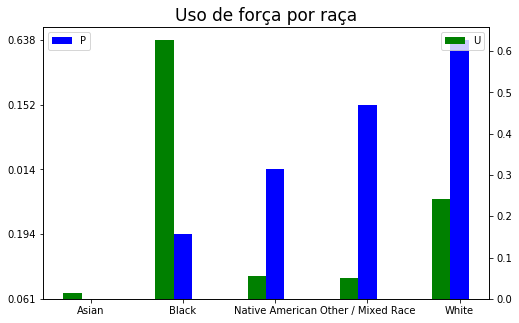

In [46]:
X = np.arange(len(census_2010_df))
plt.rcParams['xtick.labelsize'] = 10 # Definindo tamanho da fonte do título do eixo x
plt.rcParams['ytick.labelsize'] = 10 # Definindo tamanho da fonte do título do eixo y
plt.figure(figsize=(8, 5)) # Definindo tamanho do gráfico
ax = plt.subplot(111)
ax.bar(X, census_2010.values(), width=0.2, color='b', align='center')
ax2 = ax.twinx()
ax2.bar(X-0.2, tmp.ForceType, width=0.2, color='g', align='center')
ax.legend('População')
ax2.legend('Uso de força')
plt.xticks(X, census_2010.keys())
plt.title("Uso de força por raça", fontsize=17)
plt.show()